<a href="https://colab.research.google.com/github/TomasContrerasMA/CienciaDatos_Tom_Diplomado/blob/main/Expo2/Prope_Clasifiacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
#BASE DEPURADA OFICIAL

In [3]:
base = pd.read_excel('/content/AdmisionesFIUAQ_2023.xlsx')

In [ ]:
#BASE REVUELTA CON OTROS DATOS

In [255]:
L=pd.read_excel('/content/Aspirantes Aceptados 2024.xlsx', sheet_name='Hoja1')

In [257]:
L.columns

Index(['CVEASP', 'PERIODO', 'FOLIO', 'FOLIOPRE', 'SEXO', 'FECNAC', 'EDONAC',
       'NOMEST', 'CVEESCORI', 'NOMESCORI', 'EDOESCORI', 'MUNESCORI',
       'TIPESCORI', 'FECCERTIFI', 'CVECARR', 'NOMCARR', 'CVEAREA', 'NIVEL',
       'CAMPUS', 'OPCION', 'RESUOFICIA', 'PROPEDEUTI', 'CALFINAL', 'ACEPTADO',
       'CVEESC', 'CVEFAC', 'FACULTAD', 'EDOESCORID', 'MUNESCORID'],
      dtype='object')

In [ ]:
L.MUNESCORID.value_counts().head(15)

In [263]:
L.TIPESCORI.value_counts()

TIPESCORI
PUBLICA    1134
PRIVADA     926
UAQ         535
Name: count, dtype: int64

In [264]:
L.NOMESCORI.value_counts()

NOMESCORI
UNIVERSIDAD AUTONOMA DE QUERETARO ESCUELA PREPARATORIA PLANTEL NORTE               205
UNIVERSIDAD AUTONOMA DE QUERETARO ESCUELA PREPARATORIA PLANTEL SUR                 169
CENTRO DE BACHILLERATO TECNOLOGICO INDUSTRIAL  Y DE SERVICIOS No. 118               80
CENTRO DE BACHILLERATO TECNOLOGICO INDUSTRIAL Y DE SERVICIOS No. 145                77
UNIVERSIDAD AUTONOMA DE QUERETARO ESCUELA PREPARATORIA PLANTEL SAN JUAN DEL RIO     51
                                                                                  ... 
TELEBACHILLERATO COMUNITARIO PLANTEL SAN PEDRO EL VIEJO                              1
COLEGIO INTERAMERICANO                                                               1
COLEGIO LA SALLE ACAPULCO                                                            1
BACHILLERATO ANAHUAC CAMPUS CERVINO                                                  1
COLEGIO DE BACHILLERES DEL ESTADO DE HIDALGO, PLANTEL NOPALA                         1
Name: count, Length: 518, dtype: 

In [286]:
fig = px.bar(x=list(L.NOMEST.value_counts().index), y=list(L.NOMEST.value_counts()), labels={'x': 'Class', 'y': 'Count'}, title='Aspirantes por campus', template = 'plotly_white', text = list(L.NOMEST.value_counts()[:]))
fig.show()

# Distribuciones de algunos datos

In [275]:
import matplotlib.pyplot as plt

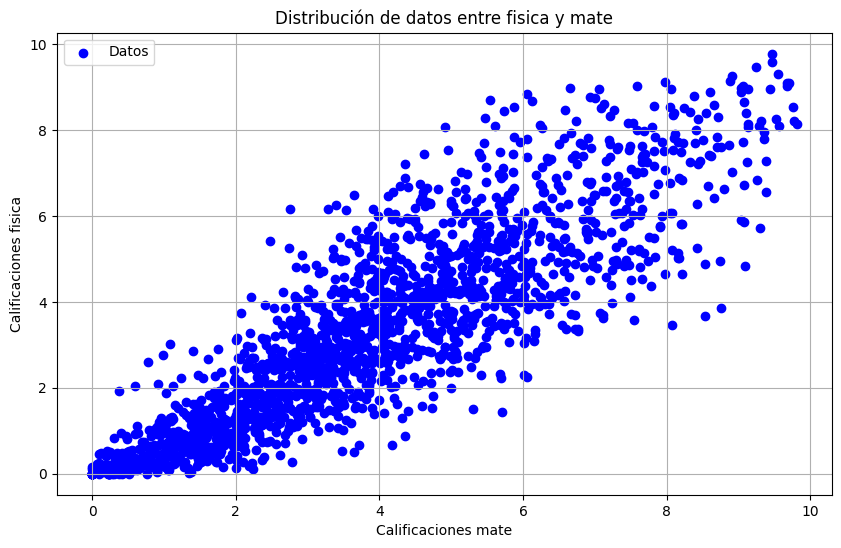

In [276]:

x = list(base.matem)
y = list(base.fisica)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, marker='o', linestyle='-', color='b', label='Datos')

plt.xlabel('Calificaciones mate')
plt.ylabel('Calificaciones fisica')
plt.title('Distribución de datos entre fisica y mate')
plt.legend()
plt.grid(True)
plt.show()


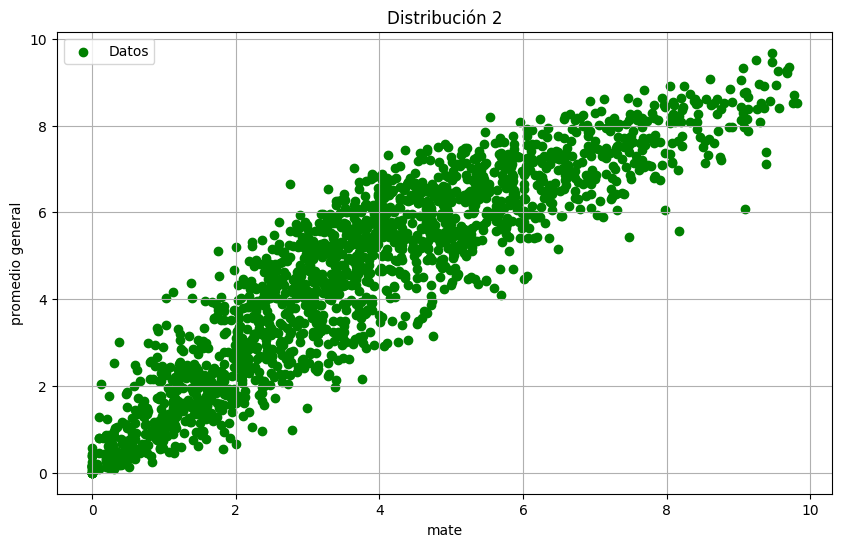

In [278]:
x = list(base.matem)
y = list(base.Promedio)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, marker='o', linestyle='-', color='g', label='Datos')

plt.xlabel('mate')
plt.ylabel('promedio general')
plt.title('Distribución 2')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
base

,usuario,genero,prepa,campus,carrera,grupoprope,matem,fisica,habpen,diseÑo,quimica,logmate,Promedio,ingresos
0,prop213745,NaN,UNIVERSIDAD AUTONOMA DE QUERETARO ESCUELA PREP...,SAN JUAN DEL RIO,INGENIERO INDUSTRIAL,SJR05,6.06,7.80,9.25,NaN,7.93,NaN,7.7600,0
1,prop213746,NaN,COLEGIO DE BACHILLERES DEL ESTADO DE QUERETARO...,QUERETARO,LICENCIADO EN ARQUITECTURA,Qro21,1.84,1.04,7.33,5.19,NaN,NaN,3.8500,0
2,prop213747,NaN,BACHILLERATO DE EDUCACION SUPERIOR EN EL ESTAD...,QUERETARO,LICENCIADO EN ARQUITECTURA,Qro32,0.86,0.67,1.34,1.80,NaN,NaN,1.1675,0
3,prop213748,NaN,CENTRO DE ESTUDIOS TECNOLOGICOS INDUSTRIAL Y D...,QUERETARO,INGENIERO CIVIL,Qro27,4.16,4.19,9.63,NaN,5.12,NaN,5.7750,0
4,prop213749,NaN,CENTRO DE ESTUDIOS TECNOLOGICOS INDUSTRIAL Y D...,QUERETARO,INGENIERO CIVIL,Qro06,3.43,2.74,7.37,NaN,2.92,NaN,4.1150,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,prop233546,NaN,COLEGIO DE ESTUDIOS CIENTIFICOS Y TECNOLOGICOS...,SAN JUAN DEL RIO,INGENIERO MECANICO Y AUTOMOTRIZ,SJR06,0.34,0.13,0.25,NaN,0.00,NaN,0.1800,0
1910,prop233644,NaN,UNIVERSIDAD AUTONOMA DE QUERETARO ESCUELA PREP...,QUERETARO,LICENCIADO EN DISEÑO INDUSTRIAL,Qro37,3.52,4.97,8.88,7.76,NaN,NaN,6.2825,0
1911,prop233653,NaN,INST DE LA VERA CRUZ,QUERETARO,LICENCIADO EN DISEÑO INDUSTRIAL,Qro30,6.60,3.38,9.68,6.89,NaN,NaN,6.6375,0
1912,prop233726,NaN,PREPARATORIA DEL SUR DE GUANAJUATO,QUERETARO,LICENCIADO EN ARQUITECTURA,Qro41,2.61,2.60,3.94,2.13,NaN,NaN,2.8200,0


# EDA

In [5]:
base.describe()

,genero,matem,fisica,habpen,diseÑo,quimica,logmate,Promedio,ingresos
count,0.0,1877.000000,1914.000000,1912.000000,900.0000,999.000000,28.000000,1914.000000,1914.000000
mean,NaN,3.827187,3.225475,6.509482,5.2009,3.923734,4.331429,4.509551,0.145768
std,NaN,2.246548,2.300016,2.985181,2.9253,2.501408,1.961779,2.364952,0.352966
min,NaN,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2.110000,1.270000,4.237500,2.6925,1.830000,3.202500,2.540000,0.000000
50%,NaN,3.650000,2.960000,7.530000,6.1750,3.800000,4.605000,4.875000,0.000000
75%,NaN,5.330000,4.790000,9.040000,7.6925,5.860000,6.062500,6.381875,0.000000
max,NaN,9.810000,9.780000,10.000000,9.5800,9.790000,6.470000,9.677500,1.000000


In [6]:
base.columns

Index(['usuario', 'genero', 'prepa', 'campus', 'carrera', 'grupoprope',
       'matem', 'fisica', 'habpen', 'diseÑo', 'quimica', 'logmate', 'Promedio',
       'ingresos'],
      dtype='object')

In [211]:
base.campus.value_counts()
fig = px.bar(x=list(base.campus.value_counts().index), y=list(base.campus.value_counts()), labels={'x': 'Class', 'y': 'Count'}, title='Aspirantes por campus', template = 'plotly_white', text = list(base.campus.value_counts()[:]))
fig.show()

In [13]:
fig = px.bar(x=list(base.carrera.value_counts().index), y=list(base.carrera.value_counts()), labels={'x': 'Class', 'y': 'Count'}, title='Aspirantes por carrera', template = 'plotly_white', text = list(base.carrera.value_counts()))
fig.show()

In [9]:
n1=base.ingresos.value_counts()
clases=['Aspirantes rechazados', 'Aspirantes admitidos']
print('Aspitantes admitidos: {a} ({pa:.2f} %)'.format(a=n1[1], pa=(n1[1]*100/1914)))
print('Aspitantes rechazados: {r} ({pr:.2f} %)'.format(r=n1[0], pr=(n1[0]*100/1914)))

Aspitantes admitidos: 279 (14.58 %)
Aspitantes rechazados: 1635 (85.42 %)


In [10]:
fig = px.bar(x=clases, y=[n1[0], n1[1]], labels={'x': 'Class', 'y': 'Count'}, title='Aspirantes admitidos vs rechazados', template = 'plotly_white', text = [n1[0], n1[1]])
fig.show()

In [11]:
base.columns

Index(['usuario', 'genero', 'prepa', 'campus', 'carrera', 'grupoprope',
       'matem', 'fisica', 'habpen', 'diseÑo', 'quimica', 'logmate', 'Promedio',
       'ingresos'],
      dtype='object')

# Codificar variables categóricas
(Sin jerarquía)

In [290]:
base

,usuario,genero,prepa,campus,carrera,grupoprope,matem,fisica,habpen,diseÑo,quimica,logmate,Promedio,ingresos
0,prop213745,NaN,UNIVERSIDAD AUTONOMA DE QUERETARO ESCUELA PREP...,SAN JUAN DEL RIO,INGENIERO INDUSTRIAL,SJR05,6.06,7.80,9.25,NaN,7.93,NaN,7.7600,0
1,prop213746,NaN,COLEGIO DE BACHILLERES DEL ESTADO DE QUERETARO...,QUERETARO,LICENCIADO EN ARQUITECTURA,Qro21,1.84,1.04,7.33,5.19,NaN,NaN,3.8500,0
2,prop213747,NaN,BACHILLERATO DE EDUCACION SUPERIOR EN EL ESTAD...,QUERETARO,LICENCIADO EN ARQUITECTURA,Qro32,0.86,0.67,1.34,1.80,NaN,NaN,1.1675,0
3,prop213748,NaN,CENTRO DE ESTUDIOS TECNOLOGICOS INDUSTRIAL Y D...,QUERETARO,INGENIERO CIVIL,Qro27,4.16,4.19,9.63,NaN,5.12,NaN,5.7750,0
4,prop213749,NaN,CENTRO DE ESTUDIOS TECNOLOGICOS INDUSTRIAL Y D...,QUERETARO,INGENIERO CIVIL,Qro06,3.43,2.74,7.37,NaN,2.92,NaN,4.1150,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,prop233546,NaN,COLEGIO DE ESTUDIOS CIENTIFICOS Y TECNOLOGICOS...,SAN JUAN DEL RIO,INGENIERO MECANICO Y AUTOMOTRIZ,SJR06,0.34,0.13,0.25,NaN,0.00,NaN,0.1800,0
1910,prop233644,NaN,UNIVERSIDAD AUTONOMA DE QUERETARO ESCUELA PREP...,QUERETARO,LICENCIADO EN DISEÑO INDUSTRIAL,Qro37,3.52,4.97,8.88,7.76,NaN,NaN,6.2825,0
1911,prop233653,NaN,INST DE LA VERA CRUZ,QUERETARO,LICENCIADO EN DISEÑO INDUSTRIAL,Qro30,6.60,3.38,9.68,6.89,NaN,NaN,6.6375,0
1912,prop233726,NaN,PREPARATORIA DEL SUR DE GUANAJUATO,QUERETARO,LICENCIADO EN ARQUITECTURA,Qro41,2.61,2.60,3.94,2.13,NaN,NaN,2.8200,0


In [31]:
b1=base.drop(['genero', 'usuario', 'prepa', 'campus', 'grupoprope'], axis=1)
b1=b1.fillna(0)

In [33]:
cat_features = b1.select_dtypes(include = ["object", "category"]).columns
cat_features

Index(['carrera'], dtype='object')

In [34]:
cat_prope = pd.get_dummies(b1['cat_features'], drop_first = True, dummy_na = True)
cat_prope.head()

,carrera_INGENIERO BIOMEDICO,carrera_INGENIERO CIVIL,carrera_INGENIERO ELECTROMECANICO,carrera_INGENIERO EN AUTOMATIZACION,carrera_INGENIERO EN CONSTRUCCION SOSTENIBLE,carrera_INGENIERO EN NANOTECNOLOGIA,carrera_INGENIERO FISICO,carrera_INGENIERO INDUSTRIAL,carrera_INGENIERO MECANICO Y AUTOMOTRIZ,carrera_LICENCIADO EN ANIMACION DIGITAL Y MEDIOS INTERACTIVOS,carrera_LICENCIADO EN ARQUITECTURA,carrera_LICENCIADO EN DISEÑO INDUSTRIAL,carrera_LICENCIADO EN MATEMATICAS APLICADAS,carrera_nan
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [42]:
b1.drop(cat_features, axis = 1, inplace = True)
b1 = pd.concat([b1, cat_prope], axis = 1)
b1.head()

,matem,fisica,habpen,diseÑo,quimica,logmate,Promedio,ingresos,carrera_INGENIERO BIOMEDICO,carrera_INGENIERO CIVIL,...,carrera_INGENIERO EN CONSTRUCCION SOSTENIBLE,carrera_INGENIERO EN NANOTECNOLOGIA,carrera_INGENIERO FISICO,carrera_INGENIERO INDUSTRIAL,carrera_INGENIERO MECANICO Y AUTOMOTRIZ,carrera_LICENCIADO EN ANIMACION DIGITAL Y MEDIOS INTERACTIVOS,carrera_LICENCIADO EN ARQUITECTURA,carrera_LICENCIADO EN DISEÑO INDUSTRIAL,carrera_LICENCIADO EN MATEMATICAS APLICADAS,carrera_nan
0,6.06,7.80,9.25,0.00,7.93,0.0,7.7600,0,False,False,...,False,False,False,True,False,False,False,False,False,False
1,1.84,1.04,7.33,5.19,0.00,0.0,3.8500,0,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0.86,0.67,1.34,1.80,0.00,0.0,1.1675,0,False,False,...,False,False,False,False,False,False,True,False,False,False
3,4.16,4.19,9.63,0.00,5.12,0.0,5.7750,0,False,True,...,False,False,False,False,False,False,False,False,False,False
4,3.43,2.74,7.37,0.00,2.92,0.0,4.1150,0,False,True,...,False,False,False,False,False,False,False,False,False,False


In [32]:
b2= base.drop(['genero', 'usuario', 'prepa', 'campus', 'grupoprope', 'carrera'], axis=1)
b2= b2.fillna(0)

In [291]:
b3= base.drop(['genero', 'usuario', 'campus', 'grupoprope', 'carrera'], axis=1)
b3= b3.fillna(0)

In [ ]:
cat_prope3 = pd.get_dummies(b3['prepa'], drop_first = True, dummy_na = True)
cat_prope3.head()

In [ ]:
b3.drop(['prepa'], axis = 1, inplace = True)
b3 = pd.concat([b3, cat_prope3], axis = 1)
b3.head()

# Preparación del modelo

In [302]:
base_reducida=b1

In [303]:
corr_matrix = base_reducida.corr()

fig = px.imshow(corr_matrix, color_continuous_scale = 'RdBu', range_color=[-1,1], text_auto = True, aspect = "auto", labels=dict(color="Correlation"), title='Feature Correlation', height = 800)
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [304]:
X=base_reducida.drop(['ingresos'], axis=1)
y=base_reducida['ingresos']

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [306]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [307]:
def plot_confusion_matrix(cm, labels):
    fig_cm = px.imshow(cm, labels=dict(x="Predicted", y="Actual", color="Count"),
                       x=labels, y=labels, color_continuous_scale='Viridis', text_auto = True,
                       title="Confusion Matrix")
    fig_cm.update_layout(coloraxis_showscale=False)
    fig_cm.show()

# Regresión Logística

In [247]:
lr = LogisticRegression(C=2)
lr.fit(X_train_scaled, y_train)

LogisticRegression(C=2)

In [248]:
lr_pred = lr.predict(X_test_scaled)

In [249]:
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")

Logistic Regression Accuracy: 0.95


In [250]:
lr_precision = precision_score(y_test, lr_pred)
print(f"Logistic Regression Precission: {lr_precision:.2f}")

Logistic Regression Precission: 0.88


In [251]:
lr_recall = recall_score(y_test, lr_pred)
print(f"Logistic Regression Recall: {lr_recall:.2f}")

Logistic Regression Recall: 0.76


In [252]:
lr_f1 = f1_score(y_test, lr_pred)
print(f"Logistic Regression F1 Score: {lr_f1:.2f}")

Logistic Regression F1 Score: 0.81


In [253]:
lr_report = classification_report(y_test, lr_pred)
print("Logistic Regression Classification Report:")
print(lr_report)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       485
           1       0.88      0.76      0.81        90

    accuracy                           0.95       575
   macro avg       0.92      0.87      0.89       575
weighted avg       0.94      0.95      0.94       575



In [254]:
lr_cm = confusion_matrix(y_test, lr_pred)
plot_confusion_matrix(lr_cm, ['Rechazado', 'Admitido'])

# KNN (K-Vecinos cercanos)

In [212]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [213]:
knn_pred = knn.predict(X_test_scaled)

In [214]:
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_accuracy:.2f}")

KNN Accuracy: 0.94


In [215]:
knn_precision = precision_score(y_test, knn_pred)
print(f"KNN Precission: {knn_precision:.2f}")

KNN Precission: 0.87


In [216]:
knn_recall = recall_score(y_test, knn_pred)
print(f"KNN Recall: {knn_recall:.2f}")

KNN Recall: 0.73


In [217]:
knn_f1 = f1_score(y_test, knn_pred)
print(f"KNN F1 Score: {knn_f1:.2f}")

KNN F1 Score: 0.80


In [218]:
knn_report = classification_report(y_test, knn_pred)
print("KNN Classification Report:")
print(knn_report)

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       485
           1       0.87      0.73      0.80        90

    accuracy                           0.94       575
   macro avg       0.91      0.86      0.88       575
weighted avg       0.94      0.94      0.94       575



In [219]:
knn_cm = confusion_matrix(y_test, knn_pred)
plot_confusion_matrix(knn_cm, ['Rechazado', 'Admitido'])

# SVM (Vector Support Machine)

In [171]:
svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC()

In [172]:
svm_pred = svm.predict(X_test_scaled)

In [173]:
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

SVM Accuracy: 0.90


In [174]:
svm_precision = precision_score(y_test, svm_pred)
print(f"SVM Precission: {svm_precision:.2f}")

SVM Precission: 0.79


In [175]:
svm_recall = recall_score(y_test, svm_pred)
print(f"KNN Recall: {svm_recall:.2f}")

KNN Recall: 0.54


In [176]:
svm_f1 = f1_score(y_test, svm_pred)
print(f"SVM F1 Score: {svm_f1:.2f}")

SVM F1 Score: 0.64


In [177]:
svm_report = classification_report(y_test, svm_pred)
print("SVM Classification Report:")
print(svm_report)

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       401
           1       0.79      0.54      0.64        78

    accuracy                           0.90       479
   macro avg       0.85      0.76      0.79       479
weighted avg       0.90      0.90      0.89       479



In [178]:
svm_cm = confusion_matrix(y_test, svm_pred)
plot_confusion_matrix(svm_cm, ['Admitido', 'Rechazado'])

# Naive Bayes

In [179]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

GaussianNB()

In [180]:
nb_pred = nb.predict(X_test_scaled)

In [181]:
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")

Naive Bayes Accuracy: 0.63


In [182]:
nb_precision = precision_score(y_test, nb_pred)
print(f"Naive Bayes Precission: {nb_precision:.2f}")

Naive Bayes Precission: 0.30


In [183]:
nb_recall = recall_score(y_test, nb_pred)
print(f"Naive Bayes Recall: {nb_recall:.2f}")

Naive Bayes Recall: 0.95


In [184]:
nb_f1 = f1_score(y_test, nb_pred)
print(f"Naive Bayes F1 Score: {nb_f1:.2f}")

Naive Bayes F1 Score: 0.46


In [185]:
nb_report = classification_report(y_test, nb_pred)
print("Naive Bayes Classification Report:")
print(nb_report)

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.57      0.72       401
           1       0.30      0.95      0.46        78

    accuracy                           0.63       479
   macro avg       0.64      0.76      0.59       479
weighted avg       0.87      0.63      0.68       479



In [186]:
nb_cm = confusion_matrix(y_test, nb_pred)
plot_confusion_matrix(nb_cm, ['Admitido', 'Rechazado'])

# Bosques aleatorios

In [187]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [188]:
rf_pred = rf.predict(X_test_scaled)

In [189]:
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.92


In [190]:
rf_precision = precision_score(y_test, rf_pred)
print(f"Random Forest Precission: {rf_precision:.2f}")

Random Forest Precission: 0.79


In [191]:
rf_recall = recall_score(y_test, rf_pred)
print(f"Random Forest Recall: {rf_recall:.2f}")

Random Forest Recall: 0.69


In [192]:
rf_f1 = f1_score(y_test, rf_pred)
print(f"Random Forest F1 Score: {rf_f1:.2f}")

Random Forest F1 Score: 0.74


In [193]:
rf_report = classification_report(y_test, rf_pred)
print("Random Forest Classification Report:")
print(rf_report)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       401
           1       0.79      0.69      0.74        78

    accuracy                           0.92       479
   macro avg       0.87      0.83      0.85       479
weighted avg       0.92      0.92      0.92       479



In [194]:
rf_cm = confusion_matrix(y_test, rf_pred)
plot_confusion_matrix(rf_cm, ['Admitido', 'Rechazado'])

# Comparación de modelos

In [220]:
models_data = {
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'SVM', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [lr_accuracy, knn_accuracy, svm_accuracy, nb_accuracy, rf_accuracy],
    'Precision': [lr_precision, knn_precision, svm_precision, nb_precision, rf_precision],
    'Recall': [lr_recall, knn_recall, svm_recall, nb_recall, rf_recall],
    'F1-Score': [lr_f1, knn_f1, svm_f1, nb_f1, rf_f1]
}

df_models = pd.DataFrame(models_data)
df_models

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.946087,0.893333,0.744444,0.812121
1,K-Nearest Neighbors,0.940870,0.868421,0.733333,0.795181
2,SVM,0.901879,0.792453,0.538462,0.641221
3,Naive Bayes,0.634656,0.302041,0.948718,0.458204
4,Random Forest,0.920668,0.794118,0.692308,0.739726


In [196]:
fig_accuracy = px.bar(df_models, x='Model', y='Accuracy', title='Model Comparison - Accuracy', template = 'plotly_white', text = 'Accuracy')
fig_accuracy.update_layout(yaxis=dict(range=[0, 1]))
fig_accuracy.show()